In [1]:
#import the needed packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

In [2]:
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

audio_files = glob('..//input/actor-01*/*.wav')
ipd.Audio(audio_files[33])

In [3]:
print(len(audio_files))

44


In [4]:
y, sr = librosa.load(audio_files[4])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-2.7717474e-14  5.6798289e-14  1.2365337e-13  9.2544868e-14
 -6.2909455e-14  6.7538172e-16  1.3351675e-13  3.5527158e-13
 -6.7067570e-13  1.0169851e-12]
shape y: (91232,)
sr: 22050


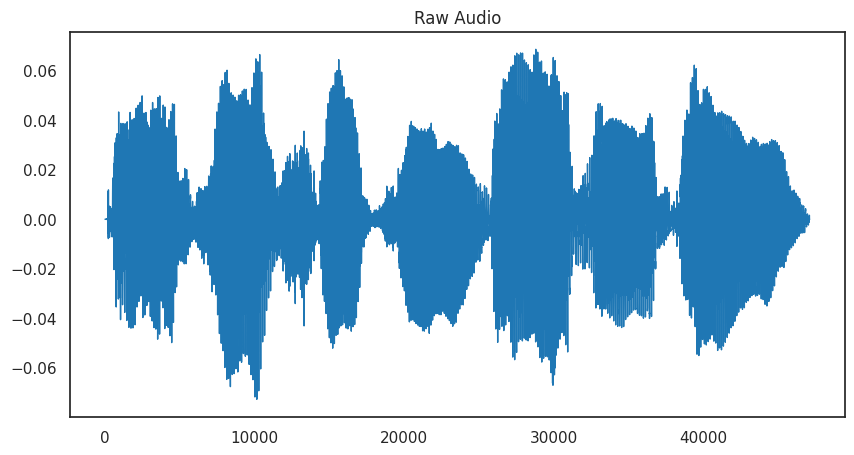

In [5]:
y_sound, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_sound).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio',
                 color=color_pal[0])
plt.show()

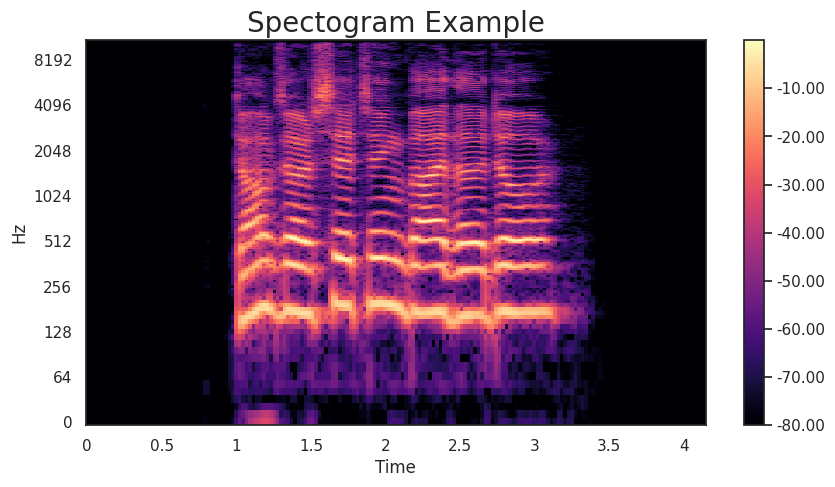

In [6]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()